In [4]:
# fazendo importações
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [5]:
# ignorando warnings
warnings.filterwarnings("ignore")

In [6]:
# Definição das colunas e tamanho
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['date', 'cod', 'opening-price', 'closing-price']

# Carregamento dos arquivos e criação dos DataFrames
df22 = pd.read_fwf('../../bkp-CSVB3/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df23 = pd.read_fwf('../../bkp-CSVB3/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df24 = pd.read_fwf('../../bkp-CSVB3/COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

In [7]:
# Filtragem das ações da Ambev (ABEV3)
ABEV3_df22 = df22[df22['cod'].str.endswith('ABEV3')]
ABEV3_df23 = df23[df23['cod'].str.endswith('ABEV3')]
ABEV3_df24 = df24[df24['cod'].str.endswith('ABEV3')]

# Unificação dos DataFrames
df = pd.concat([ABEV3_df22, ABEV3_df23, ABEV3_df24], ignore_index=True)

In [8]:
# lendo valores
df.head(20)
print(df)

         date      cod  opening-price  closing-price
0    20230102  02ABEV3         1440.0         1402.0
1    20230103  02ABEV3         1416.0         1411.0
2    20230104  02ABEV3         1428.0         1408.0
3    20230105  02ABEV3         1427.0         1414.0
4    20230106  02ABEV3         1430.0         1416.0
..        ...      ...            ...            ...
554  20240322  02ABEV3         1256.0         1237.0
555  20240325  02ABEV3         1240.0         1223.0
556  20240326  02ABEV3         1220.0         1217.0
557  20240327  02ABEV3         1236.0         1230.0
558  20240328  02ABEV3         1238.0         1236.0

[559 rows x 4 columns]


In [29]:
# Convertendo a coluna 'date' para o formato de data correto
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Obtendo os índices dos primeiros valores não nulos de cada mês
indices = df.groupby([df['date'].dt.year, df['date'].dt.month])['date'].apply(lambda x: x.first_valid_index())

# Filtrando o DataFrame com base nos índices obtidos
df_filtered = df.loc[indices].reset_index(drop=True)


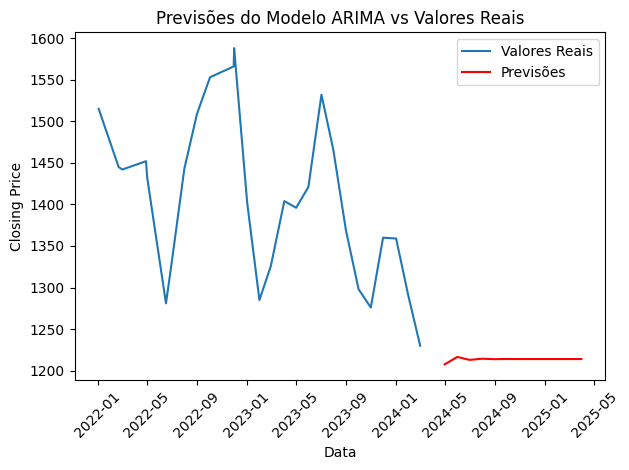

In [30]:
# Ajustando o modelo ARIMA aos dados filtrados
model_filtered = ARIMA(df_filtered['closing-price'], order=(1, 1, 1))  # Definindo a ordem do modelo ARIMA (p=1, d=1, q=1)
model_fit_filtered = model_filtered.fit()

# Gerando previsões com o modelo ajustado para os próximos 12 meses
forecast_steps = 12
predictions_filtered = model_fit_filtered.forecast(steps=forecast_steps)

# Criando o eixo X com as datas das previsões
forecast_dates = pd.date_range(start=df_filtered['date'].iloc[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plotando o gráfico com as previsões
plt.plot(df_filtered['date'], df_filtered['closing-price'], label='Valores Reais')
plt.plot(forecast_dates, predictions_filtered, label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.title('Previsões do Modelo ARIMA vs Valores Reais')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()